In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

from itertools import count
from IPython import display

import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from utils.helper_util import Func_GaussElimination,plotter

In [2]:


##diffusivity
a  = 0.005 ;

##Boundary conditions
DBC_L = 1 ;
DBC_R = 1 ;

## Delta t
dt = 0.02 ;


## grid
N  = 99 ;
x  = np.linspace(0, 1, N+2)
x  = x[1:N+1] ;
dx = x[1] - x[0] ;

## initial condition
f0 = np.zeros((len(x),1)) ;
## Build LHS matrix (matrix A)
p = a * dt / (dx**2)
A =   np.diag(-p * np.ones((N-1)), -1) + np.diag(2 * p * np.ones((N)), 0)+ np.diag(-p * np.ones((N-1)), +1)

A=A+np.identity(len(A))

## Build BC vector
u_bc = np.zeros((len(x),1))
u_bc[0] = a * dt / (dx**2) * DBC_L 
u_bc[-1] = a * dt / (dx**2) * DBC_R 
## Time stepping
f_old = f0 


In [8]:
((a*dt)/(dx**2))

1.0

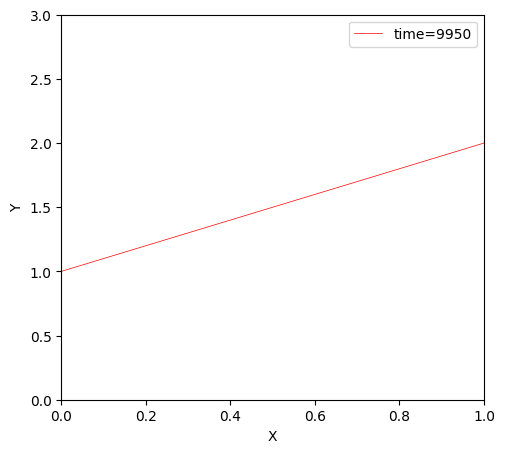

In [5]:
f_new_list=[]
xlist=[]
f_old = f0
dat_acq_int=50
for it in range(10000):
    b = u_bc + f_old 
    f_new = Func_GaussElimination(A, b) 
    f_old = f_new
    if it%dat_acq_int==0:
        f_new_list.append(np.insert(np.insert(f_new, 0, DBC_L),len(x)+1,DBC_R))
        xlist.append(np.insert(np.insert(x, 0, 0),len(x)+1,1))
HTML(plotter(xlist,f_new_list,interv=50,dat_acq=dat_acq_int).to_html5_video())

In [9]:
b = u_bc + f_old 